In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, hinge_loss
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Importing and pre-processing Breast Cancer data

In [2]:
# reading the whole data set from the text file.
data = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\breast-cancer_scale.txt", header=None, sep=" ")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2,1:-0.860107,2:-0.111111,3:-1,4:-1,5:-1,6:-0.777778,7:-1,8:-0.555556,9:-1,10:-1,NaN
1,2,1:-0.859671,2:-0.111111,3:-0.333333,4:-0.333333,5:-0.111111,6:0.333333,7:1,8:-0.555556,9:-0.777778,10:-1,NaN
2,2,1:-0.857807,2:-0.555556,3:-1,4:-1,5:-1,6:-0.777778,7:-0.777778,8:-0.555556,9:-1,10:-1,NaN
3,2,1:-0.85768,2:0.111111,3:0.555556,4:0.555556,5:-1,6:-0.555556,7:-0.333333,8:-0.555556,9:0.333333,10:-1,NaN
4,2,1:-0.857569,2:-0.333333,3:-1,4:-1,5:-0.555556,6:-0.777778,7:-1,8:-0.555556,9:-1,10:-1,NaN


In [3]:
y = data.iloc[:,0]
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: 0, Length: 683, dtype: int64

In [4]:
data.drop([0,11], axis=1, inplace=True)
data.head()

,1,2,3,4,5,6,7,8,9,10
0,1:-0.860107,2:-0.111111,3:-1,4:-1,5:-1,6:-0.777778,7:-1,8:-0.555556,9:-1,10:-1
1,1:-0.859671,2:-0.111111,3:-0.333333,4:-0.333333,5:-0.111111,6:0.333333,7:1,8:-0.555556,9:-0.777778,10:-1
2,1:-0.857807,2:-0.555556,3:-1,4:-1,5:-1,6:-0.777778,7:-0.777778,8:-0.555556,9:-1,10:-1
3,1:-0.85768,2:0.111111,3:0.555556,4:0.555556,5:-1,6:-0.555556,7:-0.333333,8:-0.555556,9:0.333333,10:-1
4,1:-0.857569,2:-0.333333,3:-1,4:-1,5:-0.555556,6:-0.777778,7:-1,8:-0.555556,9:-1,10:-1


In [5]:
#removing the colons and fetching required values in our dataset
for i in data:
    for j in range(len(data[i])):
        m,n = data[i][j].split(':')
        data[i][j] = n
data

,1,2,3,4,5,6,7,8,9,10
0,-0.860107,-0.111111,-1,-1,-1,-0.777778,-1,-0.555556,-1,-1
1,-0.859671,-0.111111,-0.333333,-0.333333,-0.111111,0.333333,1,-0.555556,-0.777778,-1
2,-0.857807,-0.555556,-1,-1,-1,-0.777778,-0.777778,-0.555556,-1,-1
3,-0.85768,0.111111,0.555556,0.555556,-1,-0.555556,-0.333333,-0.555556,0.333333,-1
4,-0.857569,-0.333333,-1,-1,-0.555556,-0.777778,-1,-0.555556,-1,-1
...,...,...,...,...,...,...,...,...,...,...
678,-0.89346,-0.555556,-1,-1,-1,-0.555556,-0.777778,-1,-1,-1
679,-0.883744,-0.777778,-1,-1,-1,-0.777778,-1,-1,-1,-1
680,-0.876716,-0.111111,1,1,-0.555556,0.333333,-0.555556,0.555556,1,-0.777778
681,-0.875424,-0.333333,0.555556,0.111111,-0.333333,-0.555556,-0.333333,1,0.111111,-1


In [6]:
#checking null values
print("checking train data features: ",data.isnull().sum())
print("checking train labels: ",y.isnull().sum())

checking train data features:  1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64
checking train labels:  0


## Splitting the data set

Fetching the train data

In [7]:
# getting the train data indices
trainIndex = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\breast-cancer-scale-train-indices.txt", header=None)
trainIndexlist = []
for i,ind in enumerate(trainIndex[:][0]):
  trainIndexlist.append(ind-1)
#trainIndex.head()
trainIndexlist

[2,
 4,
 5,
 6,
 7,
 10,
 13,
 15,
 16,
 20,
 21,
 24,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 39,
 40,
 41,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 61,
 62,
 63,
 66,
 67,
 68,
 69,
 71,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 85,
 88,
 89,
 90,
 91,
 92,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 111,
 112,
 114,
 116,
 118,
 119,
 120,
 122,
 126,
 127,
 128,
 130,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 183,
 184,
 185,
 186,
 187,
 189,
 192,
 193,
 194,
 195,
 196,
 197,
 200,
 201,
 203,
 204,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 222,
 223,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 243,
 246,
 247,
 248

In [8]:
# splitting the train data from the main data set based on train indices.
trainData = data.iloc[trainIndexlist,:]
trainData = trainData.reset_index(drop=True)
trainData.head()

,1,2,3,4,5,6,7,8,9,10
0,-0.857807,-0.555556,-1,-1,-1,-0.777778,-0.777778,-0.555556,-1,-1
1,-0.857569,-0.333333,-1,-1,-0.555556,-0.777778,-1,-0.555556,-1,-1
2,-0.857554,0.555556,1,1,0.555556,0.333333,1,0.777778,0.333333,-1
3,-0.857408,-1,-1,-1,-1,-0.777778,1,-0.555556,-1,-1
4,-0.857339,-0.777778,-1,-0.777778,-1,-0.777778,-1,-0.555556,-1,-1


In [9]:
# getting the train labels
trainLabels = y.iloc[trainIndexlist]
trainLabels = trainLabels.reset_index(drop=True)
trainLabels.head()

0    2
1    2
2    4
3    2
4    2
Name: 0, dtype: int64

Fetching the test data

In [10]:
# getting the test data indices
testIndex = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\breast-cancer-scale-test-indices.txt", header=None)
testIndexlist = []
for i,ind in enumerate(testIndex[:][0]):
  testIndexlist.append(ind-1)
testIndexlist

[0,
 1,
 3,
 8,
 9,
 11,
 12,
 14,
 17,
 18,
 19,
 22,
 23,
 25,
 26,
 35,
 38,
 42,
 43,
 49,
 56,
 60,
 64,
 65,
 70,
 72,
 74,
 81,
 84,
 86,
 87,
 93,
 94,
 101,
 109,
 113,
 115,
 117,
 121,
 123,
 124,
 125,
 129,
 131,
 136,
 140,
 152,
 153,
 157,
 160,
 166,
 167,
 172,
 177,
 182,
 188,
 190,
 191,
 198,
 199,
 202,
 205,
 206,
 214,
 221,
 224,
 225,
 242,
 244,
 245,
 250,
 259,
 261,
 262,
 263,
 269,
 273,
 274,
 275,
 276,
 281,
 284,
 287,
 288,
 292,
 296,
 297,
 306,
 307,
 308,
 312,
 314,
 317,
 322,
 323,
 333,
 340,
 341,
 343,
 347,
 349,
 358,
 362,
 367,
 369,
 384,
 385,
 386,
 390,
 391,
 392,
 413,
 414,
 415,
 420,
 429,
 431,
 433,
 443,
 445,
 450,
 455,
 457,
 461,
 467,
 469,
 471,
 483,
 492,
 496,
 497,
 502,
 506,
 513,
 515,
 523,
 525,
 526,
 527,
 534,
 538,
 545,
 550,
 560,
 562,
 564,
 566,
 567,
 570,
 571,
 575,
 576,
 578,
 579,
 581,
 586,
 587,
 588,
 600,
 602,
 605,
 606,
 607,
 609,
 611,
 614,
 617,
 619,
 620,
 627,
 628,
 629,
 630,


In [11]:
# splitting the test data from the main data set based on test indices.
testData = data.iloc[testIndexlist,:]
testData = testData.reset_index(drop=True)
testData.head()

,1,2,3,4,5,6,7,8,9,10
0,-0.860107,-0.111111,-1,-1,-1,-0.777778,-1,-0.555556,-1,-1
1,-0.859671,-0.111111,-0.333333,-0.333333,-0.111111,0.333333,1,-0.555556,-0.777778,-1
2,-0.85768,0.111111,0.555556,0.555556,-1,-0.555556,-0.333333,-0.555556,0.333333,-1
3,-0.855171,-0.777778,-1,-1,-1,-0.777778,-1,-1,-1,-0.111111
4,-0.855171,-0.333333,-0.777778,-1,-1,-0.777778,-1,-0.777778,-1,-1


In [12]:
# getting the test labels
testLabels = y.iloc[testIndexlist]
testLabels = testLabels.reset_index(drop=True)
testLabels.head()

0    2
1    2
2    2
3    2
4    2
Name: 0, dtype: int64

## Splitting train and validation set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(trainData, trainLabels, random_state=47, stratify = trainLabels)

## Find Best C for Logistic Regression Model

In [14]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [15]:
c_values = [0.1,1,10,100,1000]
meanErrorsTraining = []
meanErrorsValidation = []
kfold = KFold(n_splits=5, random_state=27, shuffle=True)

In [16]:
def findMeanSquaredErrorForC(kfold, c, X, y):
  lr = LogisticRegression(random_state=27, C=c, solver='liblinear')
  result = cross_val_score(lr, X, y, cv=kfold, scoring='neg_mean_squared_error')
  return result.mean()

In [17]:
for c in c_values:
  meanErrorsTraining.append(findMeanSquaredErrorForC(kfold, c, X_train, y_train))
  meanErrorsValidation.append(findMeanSquaredErrorForC(kfold, c, X_test, y_test))

In [18]:
print("Errors on training data for different values of c: ", meanErrorsTraining)
print("Errors on validation data for different values of c: ", meanErrorsValidation)

Errors on training data for different values of c:  [-0.192, -0.1706666666666667, -0.16, -0.1706666666666667, -0.1706666666666667]
Errors on validation data for different values of c:  [-0.096, -0.096, -0.032, -0.064, -0.064]


In [19]:
best_value_of_c = c_values[np.argsort(-np.array(meanErrorsValidation))[0]]
print("best value of C: ", best_value_of_c)

best value of C:  10


## Train the Model using the best C

In [20]:
bestLR = LogisticRegression(random_state=27, C=10, solver='liblinear').fit(trainData, trainLabels)
y_predLR = bestLR.predict(testData)
print("accuracy for cancer data with best C is: ", accuracy_score(y_predLR, testLabels))

accuracy for cancer data with best C is:  0.9617486338797814


In [21]:
error = 0
for i in range(len(y_predLR)):
  if y_predLR[i] != testLabels[i]:
    error = error + 1
print("error rate for testing data: ", error/len(y_predLR)*100, "%")  

error rate for testing data:  3.825136612021858 %


## Linear SVM

In [22]:
training_error_svm = []
validation_error_svm = []
kf = KFold(n_splits=5)

In [23]:
#creating a custom score for hinge loss
def hingeLoss(y_true, y_predict):
  return hinge_loss(y_true, y_predict)

hingeLossMetric = make_scorer(hingeLoss, greater_is_better=False)

In [24]:
for i in c_values:
  linear_svm = LinearSVC(random_state=0,C=i)
  result = cross_val_score(linear_svm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_svm.append(result.mean())
  
  result = cross_val_score(linear_svm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_svm.append(result.mean())

In [25]:
print("Trainning data errors:", training_error_svm)
print("Validation data errors:", validation_error_svm)

Trainning data errors: [-1.984, -1.984, -1.984, -1.984, -2.1173333333333333]
Validation data errors: [-1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [26]:
best_value_of_c = c_values[validation_error_svm.index(min(validation_error_svm))]
print(best_value_of_c)

0.1


In [27]:
lr_svc = LinearSVC(random_state=0,C=0.1).fit(trainData, trainLabels)
lr_svc_pred = lr_svc.predict(testData)
accuracy = accuracy_score(lr_svc_pred, testLabels)

error = 0
for i in range(len(lr_svc_pred)):
  if lr_svc_pred[i] != testLabels[i]:
    error = error + 1
error_rate = error/len(lr_svc_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels,lr_svc_pred))

Hinge Loss for testing data:  2.0054644808743167


In [28]:
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.9617486338797814
Error rate: 3.825136612021858


## Polynomial Kernel SVM

In [29]:
training_error_poly = []
validation_error_poly = []
kf = KFold(n_splits=5)

In [30]:
for i in c_values:
  polysvm = SVC(random_state=0,C=i, kernel='poly')
  result = cross_val_score(polysvm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_poly.append(result.mean())
  
  result = cross_val_score(polysvm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_poly.append(result.mean())

In [31]:
print("Trainning data errors:", training_error_poly)
print("Validation data errors:", validation_error_poly)

Trainning data errors: [-1.9893333333333334, -2.0, -2.0053333333333336, -2.0053333333333336, -2.0053333333333336]
Validation data errors: [-1.9759999999999998, -1.9599999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [32]:
best_value_of_c = c_values[validation_error_poly.index(min(validation_error_poly))]
print(best_value_of_c)

0.1


In [33]:
lr1 = SVC(random_state=0, C=0.1,kernel='poly').fit(trainData, trainLabels)
lr1_pred = lr1.predict(testData)
accuracy = accuracy_score(lr1_pred, testLabels)

error = 0
for i in range(len(lr1_pred)):
  if lr1_pred[i] != testLabels[i]:
    error = error + 1
error_rate = error/len(lr1_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels,lr1_pred))

Hinge Loss for testing data:  2.0163934426229506


In [34]:
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.9672131147540983
Error rate: 3.278688524590164


## RBF Kernel SVM

In [35]:
training_error_rbf = []
validation_error_rbf = []
kf = KFold(n_splits=5)

In [36]:
for i in c_values:
  rbfsvm = SVC(random_state=0, C=i,kernel='rbf')
  result = cross_val_score(rbfsvm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_rbf.append(result.mean())
  
  result = cross_val_score(rbfsvm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_rbf.append(result.mean())

In [37]:
print("Trainning data errors:", training_error_rbf)
print("Validation data errors:", validation_error_rbf)

Trainning data errors: [-1.9946666666666666, -1.9893333333333334, -1.9946666666666668, -2.0, -2.0]
Validation data errors: [-1.9599999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [38]:
best_value_of_c = c_values[validation_error_rbf.index(min(validation_error_rbf))]
print(best_value_of_c)

0.1


In [39]:
lr1 = SVC(random_state=0, C=0.1,kernel='rbf').fit(trainData, trainLabels)
lr1_pred = lr1.predict(testData)
accuracy = accuracy_score(lr1_pred, testLabels)

error = 0
for i in range(len(lr1_pred)):
  if lr1_pred[i] != testLabels[i]:
    error = error + 1
error_rate = error/len(lr1_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels,lr1_pred))

Hinge Loss for testing data:  2.0054644808743167


In [40]:
print("Accuracy of the model is:", accuracy)
print("Error rate:", error_rate)

Accuracy of the model is: 0.9617486338797814
Error rate: 3.825136612021858


# Sonar Data Set

In [41]:
# reading the whole data set from the text file.
sonar_data = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\sonar_scale.txt", header=None, sep=" ")
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,1,1:-0.727139,2:-0.687098,3:-0.728647,4:-0.929149,5:-0.550089,6:-0.524859,7:-0.185065,8:-0.318192,9:-0.101436,...,52:-0.945792,53:-0.688312,54:-0.128655,55:-0.70068,56:-0.164103,57:0.00568182,58:-0.629291,59:-0.509642,60:-0.879908,NaN
1,1,1:-0.353982,2:-0.556794,3:-0.455979,4:-0.699952,5:-0.433934,6:0.333512,7:0.14881,8:0.510915,9:-0.0339109,...,52:-0.783167,53:-0.563636,54:-0.777778,55:-0.600907,56:-0.0410256,57:-0.221591,58:-0.789474,59:-0.719008,60:-0.82448,NaN
2,1,1:-0.635693,2:-0.506215,3:-0.287779,4:-0.512601,5:-0.539944,6:0.170653,7:0.297619,8:0.638809,9:0.635717,...,52:-0.360913,53:-0.163636,54:-0.502924,55:-0.210884,56:0.230769,57:0.778409,58:-0.263158,59:-0.482094,60:-0.667436,NaN
3,1,1:-0.874631,2:-0.858551,3:-0.600526,4:-0.9301,5:-0.930003,6:-0.857028,7:-0.423701,8:-0.461521,9:-0.845106,...,52:-0.677603,53:-0.838961,54:-0.181287,55:-0.641723,56:-0.646154,57:-0.732955,58:-0.812357,59:-0.785124,60:-0.487298,NaN
4,1,1:0.10177,2:-0.434205,3:-0.693824,4:-0.840228,5:-0.73472,6:-0.705993,7:-0.363636,8:0.0637266,9:0.0333185,...,52:-0.934379,53:-0.745455,54:-0.444444,55:-0.528345,56:-0.94359,57:-0.607955,58:-0.79405,59:-0.415978,60:-0.593533,NaN


In [42]:
sonar_y = sonar_data.iloc[:,0]
sonar_y

0      1
1      1
2      1
3      1
4      1
      ..
203   -1
204   -1
205   -1
206   -1
207   -1
Name: 0, Length: 208, dtype: int64

In [43]:
sonar_data.drop([0,61], axis=1, inplace=True)
sonar_data.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,1:-0.727139,2:-0.687098,3:-0.728647,4:-0.929149,5:-0.550089,6:-0.524859,7:-0.185065,8:-0.318192,9:-0.101436,10:-0.428571,...,51:-0.537849,52:-0.945792,53:-0.688312,54:-0.128655,55:-0.70068,56:-0.164103,57:0.00568182,58:-0.629291,59:-0.509642,60:-0.879908
1,1:-0.353982,2:-0.556794,3:-0.455979,4:-0.699952,5:-0.433934,6:0.333512,7:0.14881,8:0.510915,9:-0.0339109,10:-0.210925,...,51:-0.750996,52:-0.783167,53:-0.563636,54:-0.777778,55:-0.600907,56:-0.0410256,57:-0.221591,58:-0.789474,59:-0.719008,60:-0.82448
2,1:-0.635693,2:-0.506215,3:-0.287779,4:-0.512601,5:-0.539944,6:0.170653,7:0.297619,8:0.638809,9:0.635717,10:0.739168,...,51:-0.934263,52:-0.360913,53:-0.163636,54:-0.502924,55:-0.210884,56:0.230769,57:0.778409,58:-0.263158,59:-0.482094,60:-0.667436
3,1:-0.874631,2:-0.858551,3:-0.600526,4:-0.9301,5:-0.930003,6:-0.857028,7:-0.423701,8:-0.461521,9:-0.845106,10:-0.670814,...,51:-0.51992,52:-0.677603,53:-0.838961,54:-0.181287,55:-0.641723,56:-0.646154,57:-0.732955,58:-0.812357,59:-0.785124,60:-0.487298
4,1:0.10177,2:-0.434205,3:-0.693824,4:-0.840228,5:-0.73472,6:-0.705993,7:-0.363636,8:0.0637266,9:0.0333185,10:0.242957,...,51:-0.689243,52:-0.934379,53:-0.745455,54:-0.444444,55:-0.528345,56:-0.94359,57:-0.607955,58:-0.79405,59:-0.415978,60:-0.593533


In [44]:
print("checking train data features: ",sonar_data.isnull().sum())
print("checking train labels: ",sonar_y.isnull().sum())

checking train data features:  1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    1
dtype: int64
checking train labels:  0


In [45]:
sonar_data[60] = sonar_data[60].fillna("0:0")

In [46]:
#removing the colons and fetching required values in our dataset
for i in sonar_data:
    for j in range(len(sonar_data[i])):
        #print(sonar_data[i][j])
        m,n = sonar_data[i][j].split(':')
        sonar_data[i][j] = float(n)
sonar_data

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.727139,-0.687098,-0.728647,-0.929149,-0.550089,-0.524859,-0.185065,-0.318192,-0.101436,-0.428571,...,-0.537849,-0.945792,-0.688312,-0.128655,-0.70068,-0.164103,0.005682,-0.629291,-0.509642,-0.879908
1,-0.353982,-0.556794,-0.455979,-0.699952,-0.433934,0.333512,0.14881,0.510915,-0.033911,-0.210925,...,-0.750996,-0.783167,-0.563636,-0.777778,-0.600907,-0.041026,-0.221591,-0.789474,-0.719008,-0.82448
2,-0.635693,-0.506215,-0.287779,-0.512601,-0.539944,0.170653,0.297619,0.638809,0.635717,0.739168,...,-0.934263,-0.360913,-0.163636,-0.502924,-0.210884,0.230769,0.778409,-0.263158,-0.482094,-0.667436
3,-0.874631,-0.858551,-0.600526,-0.9301,-0.930003,-0.857028,-0.423701,-0.461521,-0.845106,-0.670814,...,-0.51992,-0.677603,-0.838961,-0.181287,-0.641723,-0.646154,-0.732955,-0.812357,-0.785124,-0.487298
4,0.10177,-0.434205,-0.693824,-0.840228,-0.73472,-0.705993,-0.363636,0.063727,0.033319,0.242957,...,-0.689243,-0.934379,-0.745455,-0.444444,-0.528345,-0.94359,-0.607955,-0.79405,-0.415978,-0.593533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.746313,-0.70853,-0.899474,-0.943414,-0.834644,-0.178715,0.079546,-0.277178,-0.332741,-0.264693,...,-0.595618,-0.691869,-0.516883,0.105263,-0.877551,-0.502564,-0.647727,-0.487414,0.057851,-0.30254
204,-0.545723,-0.91856,-0.81406,-0.759391,-0.648491,-0.539909,-0.482143,-0.575303,-0.717163,-0.416273,...,-0.898406,-0.848787,-0.542857,-0.269006,-0.741497,-0.697436,-0.823864,-0.867277,-0.663912,-0.718245
205,-0.252212,-0.630519,-0.89159,-0.88873,-0.855947,-0.425423,-0.337662,-0.504741,-0.649637,-0.309023,...,-0.691235,-0.566334,-0.875325,-0.760234,-0.746032,-0.564103,-0.221591,-0.382151,-0.581267,-0.884527
206,-0.575221,-0.702529,-0.687911,-0.738469,-0.949277,-0.327063,-0.225108,-0.528997,-0.446172,-0.359073,...,-0.916335,-0.777461,-0.787013,-0.321637,-0.863946,-0.841026,-0.823864,-0.652174,-0.807163,-0.806005


In [47]:
trainIndex_sonar = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\sonar-scale-train-indices.txt", header=None)
trainIndexlist_sonar = []
for i,ind in enumerate(trainIndex_sonar[:][0]):
  trainIndexlist_sonar.append(ind-1)
#trainIndex.head()
trainIndexlist_sonar

[2,
 4,
 5,
 6,
 7,
 10,
 13,
 15,
 16,
 20,
 21,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 36,
 37,
 39,
 40,
 41,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 66,
 67,
 68,
 69,
 71,
 73,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 85,
 88,
 89,
 90,
 91,
 92,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 114,
 116,
 118,
 119,
 120,
 122,
 126,
 127,
 128,
 130,
 132,
 133,
 134,
 135,
 137,
 138,
 139,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 154,
 155,
 156,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 168,
 169,
 170,
 171,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 189,
 192,
 193,
 194,
 195,
 196,
 197,
 200,
 201,
 203,
 204,
 207]

In [48]:
# splitting the train data from the main data set based on train indices.
trainData_sonar = sonar_data.iloc[trainIndexlist_sonar,:]
trainData_sonar = trainData_sonar.reset_index(drop=True)
trainData_sonar.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.635693,-0.506215,-0.287779,-0.512601,-0.539944,0.170653,0.297619,0.638809,0.635717,0.739168,...,-0.934263,-0.360913,-0.163636,-0.502924,-0.210884,0.230769,0.778409,-0.263158,-0.482094,-0.667436
1,0.10177,-0.434205,-0.693824,-0.840228,-0.73472,-0.705993,-0.363636,0.063727,0.033319,0.242957,...,-0.689243,-0.934379,-0.745455,-0.444444,-0.528345,-0.94359,-0.607955,-0.79405,-0.415978,-0.593533
2,-0.600295,-0.616802,-0.827858,-0.944841,-0.839209,-0.522709,-0.367965,-0.215877,-0.398786,-0.163163,...,-0.792829,-0.894437,-0.953247,-0.836257,-0.968254,-0.564103,-0.693182,-0.89016,-0.724518,-0.741339
3,-0.554572,-0.185598,-0.141919,-0.35806,-0.184885,-0.135716,-0.622294,-0.406395,-0.405301,-0.027599,...,-0.611554,-0.449358,0.262338,-0.292398,-0.709751,-0.312821,-0.494318,-0.359268,-0.807163,-0.551963
4,-0.256637,-0.535362,-0.456636,-0.875892,-0.446614,-0.559258,-0.462121,-0.753914,-0.588331,-0.220649,...,-0.896414,-0.791726,-0.402597,-0.795322,-0.478458,-0.523077,-0.534091,-0.798627,-0.741047,-0.78291


In [49]:
# getting the train labels
trainLabels_sonar = sonar_y.iloc[trainIndexlist_sonar]
trainLabels_sonar = trainLabels_sonar.reset_index(drop=True)
trainLabels_sonar.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [50]:
# getting the test data indices
testIndex_sonar = pd.read_csv("C:\\Users\\Rahul\\Documents\\CS-688\\data_assignment4\\data_assignment4\\sonar-scale-test-indices.txt", header=None)
testIndexlist_sonar = []
for i,ind in enumerate(testIndex_sonar[:][0]):
  testIndexlist_sonar.append(ind-1)
testIndexlist_sonar

[0,
 1,
 3,
 8,
 9,
 11,
 12,
 14,
 17,
 18,
 19,
 22,
 23,
 25,
 35,
 38,
 42,
 43,
 49,
 56,
 64,
 65,
 70,
 72,
 74,
 81,
 84,
 86,
 87,
 93,
 94,
 101,
 113,
 115,
 117,
 121,
 123,
 124,
 125,
 129,
 131,
 136,
 140,
 152,
 153,
 157,
 160,
 166,
 167,
 172,
 188,
 190,
 191,
 198,
 199,
 202,
 205,
 206]

In [51]:
# splitting the test data from the main data set based on test indices.
testData_sonar = sonar_data.iloc[testIndexlist_sonar,:]
testData_sonar = testData_sonar.reset_index(drop=True)
testData_sonar.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.727139,-0.687098,-0.728647,-0.929149,-0.550089,-0.524859,-0.185065,-0.318192,-0.101436,-0.428571,...,-0.537849,-0.945792,-0.688312,-0.128655,-0.70068,-0.164103,0.005682,-0.629291,-0.509642,-0.879908
1,-0.353982,-0.556794,-0.455979,-0.699952,-0.433934,0.333512,0.14881,0.510915,-0.033911,-0.210925,...,-0.750996,-0.783167,-0.563636,-0.777778,-0.600907,-0.041026,-0.221591,-0.789474,-0.719008,-0.82448
2,-0.874631,-0.858551,-0.600526,-0.9301,-0.930003,-0.857028,-0.423701,-0.461521,-0.845106,-0.670814,...,-0.51992,-0.677603,-0.838961,-0.181287,-0.641723,-0.646154,-0.732955,-0.812357,-0.785124,-0.487298
3,-0.693215,-0.683669,-0.691853,-0.801712,-0.705808,-0.737167,-0.61039,-0.981036,-0.819636,-0.607036,...,-0.878486,-0.60913,-0.361039,-0.210526,-0.764172,-0.769231,-0.647727,-0.588101,-0.680441,-0.926097
4,-0.780236,-0.856837,-0.781866,-0.994294,-0.939133,-0.694168,-0.446429,-0.716869,-0.737302,-0.960532,...,-0.76494,-0.766049,0.132468,-0.011696,-0.646259,-0.671795,-0.835227,-0.853547,-0.69697,-0.842956


In [52]:
# getting the test labels
testLabels_sonar = sonar_y.iloc[testIndexlist_sonar]
testLabels_sonar = testLabels_sonar.reset_index(drop=True)
testLabels.head()

0    2
1    2
2    2
3    2
4    2
Name: 0, dtype: int64

## splitting and validation set

In [53]:
X_train_sonar, X_test_sonar, y_train_sonar, y_test_sonar = train_test_split(trainData_sonar, trainLabels_sonar, random_state=47, stratify = trainLabels_sonar)

## find best C using Logistic Regression

In [54]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [55]:
c_values = [0.1,1,10,100,1000]
meanErrorsTraining_sonar = []
meanErrorsValidation_sonar = []
kfold = KFold(n_splits=5, random_state=27, shuffle=True)

In [56]:
def findMeanSquaredErrorForC(kfold, c, X, y):
  lr = LogisticRegression(random_state=27, C=c, solver='liblinear')
  result = cross_val_score(lr, X, y, cv=kfold, scoring='neg_mean_squared_error')
  return result.mean()

In [57]:
for c in c_values:
  meanErrorsTraining_sonar.append(findMeanSquaredErrorForC(kfold, c, X_train_sonar, y_train_sonar))
  meanErrorsValidation_sonar.append(findMeanSquaredErrorForC(kfold, c, X_test_sonar, y_test_sonar))

In [58]:
print("Errors on training data for different values of c: ", meanErrorsTraining_sonar)
print("Errors on validation data for different values of c: ", meanErrorsValidation_sonar)

Errors on training data for different values of c:  [-1.0039525691699605, -1.0023715415019763, -0.9976284584980238, -0.9264822134387352, -0.9264822134387352]
Errors on validation data for different values of c:  [-1.5, -1.4, -1.3, -1.6, -1.6857142857142855]


In [59]:
best_value_of_c = c_values[np.argsort(-np.array(meanErrorsValidation_sonar))[0]]
print("best value of C: ", best_value_of_c)

best value of C:  10


## Train the model using best C

In [60]:
bestLR = LogisticRegression(random_state=27, C=10, solver='liblinear').fit(trainData_sonar, trainLabels_sonar)
y_predLR = bestLR.predict(testData_sonar)
print("accuracy for cancer data with best C is: ", accuracy_score(y_predLR, testLabels_sonar))

accuracy for cancer data with best C is:  0.7758620689655172


In [61]:
error = 0
for i in range(len(y_predLR)):
  if y_predLR[i] != testLabels_sonar[i]:
    error = error + 1
print("error rate for testing data: ", error/len(y_predLR)*100, "%")  

error rate for testing data:  22.413793103448278 %


## Linear SVM

In [62]:
training_error_sonar_svm = []
validation_error_sonar_svm = []
kf = KFold(n_splits=5)

In [63]:
def hingeLoss(y_true, y_predict):
  return hinge_loss(y_true, y_predict)

hingeLossMetric = make_scorer(hingeLoss, greater_is_better=False)

In [64]:
for i in c_values:
  linear_svm = LinearSVC(random_state=0,C=i)
  result = cross_val_score(linear_svm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_sonar_svm.append(result.mean())
  
  result = cross_val_score(linear_svm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_sonar_svm.append(result.mean())

In [65]:
print("Trainning data errors:", training_error_sonar_svm)
print("Validation data errors:", validation_error_sonar_svm)

Trainning data errors: [-1.984, -1.984, -1.984, -1.984, -2.1173333333333333]
Validation data errors: [-1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [66]:
best_value_of_c = c_values[validation_error_sonar_svm.index(min(validation_error_sonar_svm))]
print(best_value_of_c)

0.1


In [67]:
lr1 = LinearSVC(random_state=0,C=0.1).fit(trainData_sonar, trainLabels_sonar)
lr1_pred = lr1.predict(testData_sonar)
accuracy = accuracy_score(lr1_pred, testLabels_sonar)

error = 0
for i in range(len(lr1_pred)):
  if lr1_pred[i] != testLabels_sonar[i]:
    error = error + 1
error_rate = error/len(lr1_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels_sonar,lr1_pred))

Hinge Loss for testing data:  0.5172413793103449


In [68]:
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.7413793103448276
Error rate: 25.862068965517242


## Polynomial Kernel SVM

In [69]:
training_error_sonar_poly = []
validation_error_sonar_poly = []
kf = KFold(n_splits=5)

In [70]:
for i in c_values:
  poly_svm = SVC(random_state=0, C=i,kernel='poly')
  result = cross_val_score(poly_svm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_sonar_poly.append(result.mean())
  
  result = cross_val_score(poly_svm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_sonar_poly.append(result.mean())

In [71]:
print("Trainning data errors:", training_error_sonar_poly)
print("Validation data errors:", validation_error_sonar_poly)

Trainning data errors: [-1.9893333333333334, -2.0, -2.0053333333333336, -2.0053333333333336, -2.0053333333333336]
Validation data errors: [-1.9759999999999998, -1.9599999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [72]:
best_value_of_c = c_values[validation_error_sonar_poly.index(min(validation_error_sonar_poly))]
print(best_value_of_c)

0.1


In [73]:
lr1 = SVC(random_state=0,C=0.1, kernel='poly').fit(trainData_sonar, trainLabels_sonar)
lr1_pred = lr1.predict(testData_sonar)
accuracy = accuracy_score(lr1_pred, testLabels_sonar)

error = 0
for i in range(len(lr1_pred)):
  if lr1_pred[i] != testLabels_sonar[i]:
    error = error + 1
error_rate = error/len(lr1_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels_sonar,lr1_pred))

Hinge Loss for testing data:  0.6206896551724138


In [74]:
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.6896551724137931
Error rate: 31.03448275862069


## RBF Kernel

In [75]:
training_error_sonar_rbf = []
validation_error_sonar_rbf = []
kf = KFold(n_splits=5)

In [76]:
for i in c_values:
  rbf_svm = SVC(random_state=0, C=i,kernel='rbf')
  result = cross_val_score(rbf_svm, X_train, y_train, cv=kf, scoring=hingeLossMetric)
  training_error_sonar_rbf.append(result.mean())
  
  result = cross_val_score(rbf_svm, X_test, y_test, cv=kf, scoring=hingeLossMetric)
  validation_error_sonar_rbf.append(result.mean())

In [77]:
print("Trainning data errors:", training_error_sonar_rbf)
print("Validation data errors:", validation_error_sonar_rbf)

Trainning data errors: [-1.9946666666666666, -1.9893333333333334, -1.9946666666666668, -2.0, -2.0]
Validation data errors: [-1.9599999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997, -1.9439999999999997]


In [78]:
best_value_of_c = c_values[validation_error_sonar_rbf.index(min(validation_error_sonar_rbf))]
print(best_value_of_c)

0.1


In [79]:
lr1 = SVC(random_state=0,C=0.1, kernel='rbf').fit(trainData_sonar, trainLabels_sonar)
lr1_pred = lr1.predict(testData_sonar)
accuracy = accuracy_score(lr1_pred, testLabels_sonar)

error = 0
for i in range(len(lr1_pred)):
  if lr1_pred[i] != testLabels_sonar[i]:
    error = error + 1
error_rate = error/len(lr1_pred)*100
print("Hinge Loss for testing data: ", hinge_loss(testLabels_sonar,lr1_pred))

Hinge Loss for testing data:  1.0689655172413792


In [80]:
print("Accuracy:", accuracy)
print("Error rate:", error_rate)

Accuracy: 0.46551724137931033
Error rate: 53.44827586206896


## Comparison

In [81]:
breast_cancer_dataset_error_rate = [3.8251, 3.8251, 3.2787, 3.8251]
sonar_dataset_error_rate = [22.4138, 25.8621, 31.0345, 53.4482]

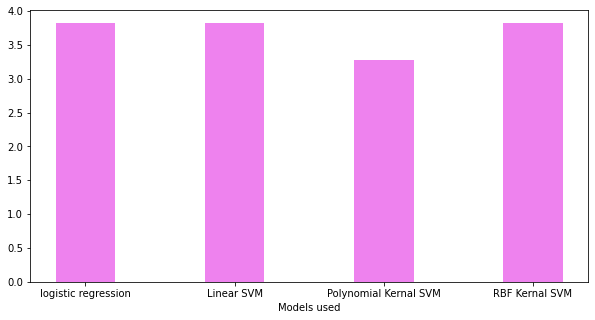

In [82]:
# creating the dataset
breast_cancer_dataset_error_rate = {'logistic regression':3.8251, 'Linear SVM':3.8251, 'Polynomial Kernal SVM':3.2787,
		'RBF Kernal SVM':3.8251}
model = list(breast_cancer_dataset_error_rate.keys())
values = list(breast_cancer_dataset_error_rate.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(model, values, color ='violet',
		width = 0.4)

plt.xlabel("Models used")
plt.show()


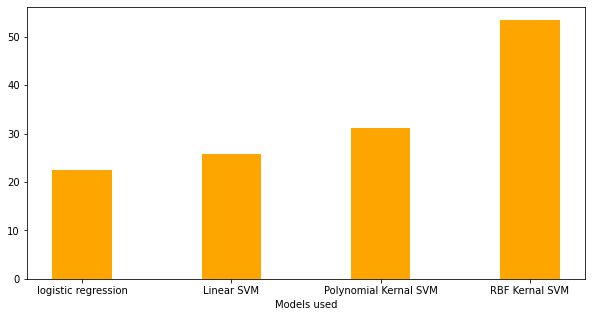

In [83]:
# creating the dataset
sonar_scale_dataset_error_rate = {'logistic regression':22.4138, 'Linear SVM':25.8621, 'Polynomial Kernal SVM':31.0345,
		'RBF Kernal SVM':53.4482}
model = list(sonar_scale_dataset_error_rate.keys())
values = list(sonar_scale_dataset_error_rate.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(model, values, color ='orange',
		width = 0.4)

plt.xlabel("Models used")
plt.show()
